### Forward propagation

In [304]:
import numpy as np

In [305]:
sigmoid = lambda x: 1/(1 + np.exp(-x)) # sigmoid function, activation function of a neuron
dsigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))
derror = lambda x,y: x - y

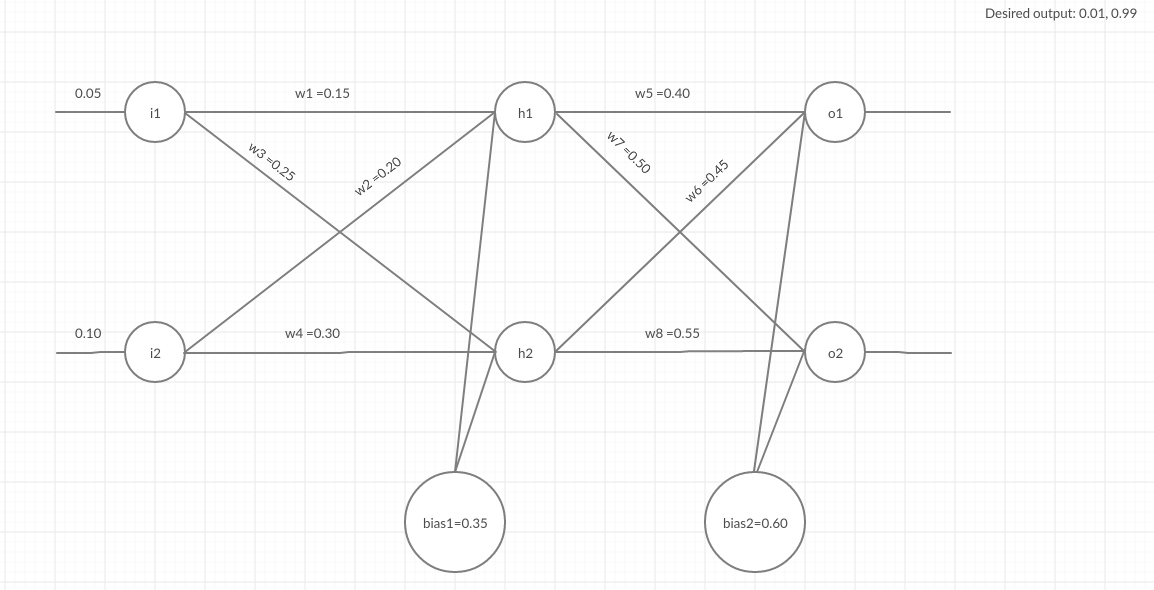

### Forward pass

In [306]:
W1 = np.array([[0.15, 0.20],[0.25, 0.30]])
bias1 = np.array([0.35,0.35]).transpose()
net_in = np.array([0.05, 0.10]).transpose()
h_input = W1.dot(net_in) + bias1
print("Input into hidden layer is:", h_input)
h_output = sigmoid(h_input)
print("Output from hidden layer is:", h_output)

Input into hidden layer is: [0.3775 0.3925]
Output from hidden layer is: [0.59326999 0.59688438]


In [307]:
W2 = np.array([[0.40,0.45],[0.50, 0.55]])
bias2 = np.array([0.60, 0.60]).transpose()
o_in = W2 @ h_output + bias2
print("Input into o-layer is:", o_in)
o_out = sigmoid(o_in)
print("Network's output is:", o_out)

Input into o-layer is: [1.10590597 1.2249214 ]
Network's output is: [0.75136507 0.77292847]


### Back pass

$$
\text{Cost function:}\\ C = \sum{\frac{1}{2}(desired - output)^2}\\
$$

$$ \text{Derivative of the cost function:}\\ \sum{(output - desired)} $$

$$ \text{Sigmoid:}\\ \sigma(x) = \frac{1}{1+e^{-x}} $$

$$
\text{Derivative of the sigmoid:}\\
\sigma(x)(1-\sigma(x))
$$

$$
\text{Weights:}\\
input_1w_1 + input_2w_2\\
input_1w_3 + input_2w_4\\
...
$$

$$
\frac{\partial C}{\partial w_5} = \frac{\partial C}{\partial o_{1_{out}}}\frac{\partial o_{1_{out}}}{\partial o_{1_{in}}}\frac{\partial o_{1_{in}}}{\partial w_5}
$$

$$
\frac{\partial C}{\partial w_5} = (output - desired)\sigma(o_{in})(1-\sigma(o_{in})h_1
$$

Learning rate used is 0.5. So the new weight will be: $ w_i = w_i - 0.5\frac{\partial C}{\partial w_i} $

In [308]:
desired = np.array([0.01, 0.99]).transpose()
dw = np.array([[derror(o_out[0],desired[0])*dsigmoid(o_in[0])*h_output[0],derror(o_out[0],desired[0])*dsigmoid(o_in[0])*h_output[1]]
          ,[derror(o_out[1],desired[1])*dsigmoid(o_in[1])*h_output[0],derror(o_out[1],desired[1])*dsigmoid(o_in[1])*h_output[1]]])
print("New weights of W2:\n",W2 - 0.5*dw)

New weights of W2:
 [[0.35891648 0.40866619]
 [0.51130127 0.56137012]]


### Weights of the first layer, before the hidden layer

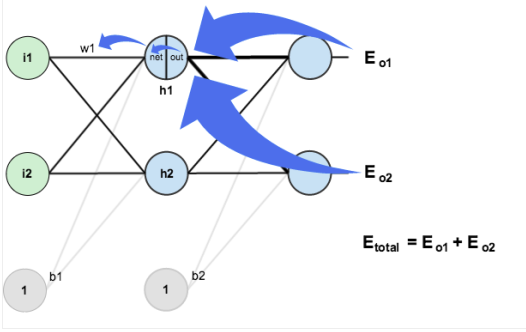

$$
\frac{\partial C}{\partial w_1} = (\frac{\partial E_{o1}}{\partial h1_{out}} + \frac{\partial E_{o2}}{\partial h1_{out}})\frac{\partial h1_{out}}{\partial h1_{net}}\frac{\partial h1_{net}}{\partial w_1}
$$

$$
\frac{\partial E_{o1}}{\partial h1_{out}} = \frac{\partial C}{\partial o_{1_{out}}}\frac{\partial o_{1_{out}}}{\partial o_{1_{in}}}\frac{\partial o_{1_{in}}}{\partial h1_{out}}
$$

$$
\frac{\partial E_{o2}}{\partial h1_{out}} = \frac{\partial C}{\partial o_{2_{out}}}\frac{\partial o_{2_{out}}}{\partial o_{2_{in}}}\frac{\partial o_{2_{in}}}{\partial h1_{out}}
$$

$$
\frac{\partial E_{o1}}{\partial h1_{out}} = 
$$

Back propagation for weight w1

In [309]:
dw1 = (derror(o_out[0],desired[0])*dsigmoid(o_in[0])*0.4 + derror(o_out[1],desired[1])*dsigmoid(o_in[1])*0.5)*dsigmoid(h_input[0])*0.05
w1 = 0.15 - 0.5*dw1
print("New weight w1 is:",w1)

New weight w1 is: 0.1497807161327628


Proceeding the same way we get:
$$
w_2 = 0.19956\\
w_3 = 0.2497\\
w_4 = 0.2995
$$

### Matrix notation

In [310]:
sigmoid = lambda x: 1/(1+np.exp(-x))
dsigmoid = lambda x: sigmoid(x)*(1-sigmoid(x))

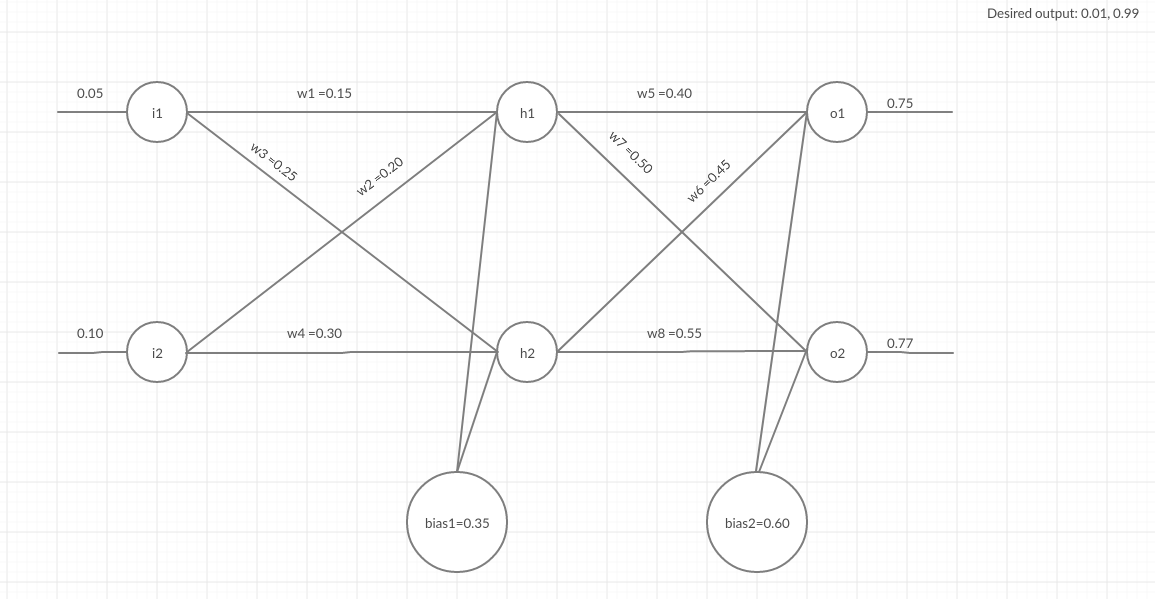

Let's from weight matrices. Path with the weights between i1 and h1 will be $W_1$ and between h1 and o1 will be $W_2$. Each entry of $W_i$ matrix is weight. It's subscript consists of two numbers. The first represents TO what neuron in the NEXT LAYER output will be sent. The second represent FROM which neuron output will be sent to the NEXT layer. Then subscripts represents places in the matrix. Superscript represents the layer. So W1 will be:
$$
W_1 = \begin{bmatrix}
w_1 & w_2\\
w_3 & w_4
\end{bmatrix}
W_2 = \begin{bmatrix}
w_5 & w_6\\
w_7 & w_8
\end{bmatrix}
$$


#### Then the forward pass is simply:

In [311]:
bias1 = 0.35
bias2 = 0.60
desired = np.array([0.01, 0.99])
net_input = np.array([0.05, 0.10])
hout = sigmoid(W1 @ net_input + bias1) # output of the hidden layer
print("Output from the hidden layer:", hout)
net_out = sigmoid(W2 @ hout + bias2) # output from the network
print("Output from the network:", net_out)

Output from the hidden layer: [0.59326999 0.59688438]
Output from the network: [0.75136507 0.77292847]


#### Backward pass

Now we need to calculate $\frac{\partial E}{\partial W_2}$. This holds for the last layer!

Let's take a look at 1D example and calculate derivative w.r.t. $w_5$:
$$
\frac{\partial E}{\partial w_5} = \frac{\partial E}{\partial output}\frac{\partial output}{\partial z}\frac{\partial z}{\partial w_5} = \underbrace{(\hat y - y)}_{\frac{\partial E}{\partial output}}\underbrace{\sigma(z)(1-sigma(z))}_{\frac{\partial output}{\partial z}}\underbrace{h_1}_{\frac{\partial z}{\partial w_5}}
$$
Now let's see what happens in N-dimensions:
$$
\frac{\partial E}{\partial W_2} = (\hat y - y) \frac{\partial out}{\partial W_2}=\\
=(\hat y - y)\odot f'(W_2*h_{out})\frac{\partial W_2*hout}{\partial W_2}=\\
=\underbrace{[(\hat y - y)\odot f'(W_2*h_{out})]}_{\delta_2}\underbrace{h_{out}^T}=\\
=\delta_2 * h_{out}^T
$$
Then the weights update for the $W_2$ will be:
$$
W_2 = W_2 - \alpha \frac{\partial E}{\partial W_2}
$$

In [312]:
delta = np.matrix((net_out - desired) * dsigmoid(W2 @ hout + bias2)).T
h_out = np.matrix(hout).T
dw2 = delta @ h_out.T
print("Derivatives w.r.t. W2")
print(dw2)

Derivatives w.r.t. W2
[[ 0.08216704  0.08266763]
 [-0.02260254 -0.02274024]]


Update the weights in $W_2$ (suppose $\alpha$ = 0.5):

In [313]:
W2_new = W2 - 0.5*dw2
W2_new

matrix([[0.35891648, 0.40866619],
        [0.51130127, 0.56137012]])

Now let's see what happens on the $W_1$ weight's layer. Here we can reuse computed above $\delta$ in order not to perform the same computations again.

The equation is almost the same.
$$
\frac{\partial E}{\partial W_1} = (\hat y - y)\frac{\partial out}{\partial W_1}\\
=[(\hat y - y)\odot f'(W_2*h_{out})]\frac{\partial W_2*h_{out}}{\partial W_1}=\\
=\delta_2\frac{\partial W_2*h_{out}}{\partial W_1}= W_2^T \delta_2 \frac{\partial h_{out}}{W_2} \\
=\underbrace{[W_2^T\delta_2 \odot f'(W_1*net_{in})]}_{\delta_{1}}\underbrace{\frac{\partial W_1*net_{in}}{\partial W_1}}_{net_{in}^T}=\\
 = \delta_{1} * net_{in}^T
$$

In [336]:
W1 = np.matrix(W1)
W2 = np.matrix(W2)
h_out = np.matrix(hout).T
netin = np.matrix(net_in).T
dsig = np.vectorize(dsigmoid)
delta1 = (W2 @ delta)
dsg = np.matrix(dsigmoid(np.array(W1 @ netin)))
delta1 = np.array(dsg) * np.array(delta1)
dw1 = np.matrix(delta1) @ np.matrix(net_in)

New weights for $W_1$

In [338]:
W1 - 0.5*dw1

matrix([[0.14976095, 0.1995219 ],
        [0.24969829, 0.29939658]])

Equations for the back propagation:
$$
\delta_L = (x_L - t) \odot f'_L(W_Lx_{L-1}) \text{ The last layer/output layer}\\
\delta_i = W_{i+1}^T \delta_{i+1} \odot f'_i(W_ix_{i-1}) \\
\frac{\partial E}{\partial W_i} = \delta_ix_{i-1}^T \\
W_i = W_i - \alpha\frac{\partial E}{\partial W_i}
$$